In [227]:
# import dependencies 

import numpy as np

import matplotlib.pyplot as plt

from pandas import read_csv

In [228]:
def stal_age( x, depth_ax, y, y_err ):
    
    '''
    Function takes in age, age error, depth, spaced our depth.
    It returns age with uncertainty
    
    input:
        x = depth in mm from top 
        depth_ax = equally spaced x axis
        y = age in years
        y_err = error in ages
    
    output: 
        age_ax = linear interpolation at different depths 
    
    '''
    
    top_err    = np.random.randint( -y_err[0],y_err[0], size=1 )
    bottom_err = np.random.randint( -y_err[1],y_err[1], size=1 ) 
    
    y_err_rnd  = np.concatenate( (top_err,bottom_err) )
    
    y_with_error = y + y_err_rnd
    stal_coef = np.polyfit( x, y_with_error, 1 )
    
    stal_poly = np.poly1d(stal_coef)

    
    age_ax    = stal_poly( depth_ax )
    
    return age_ax

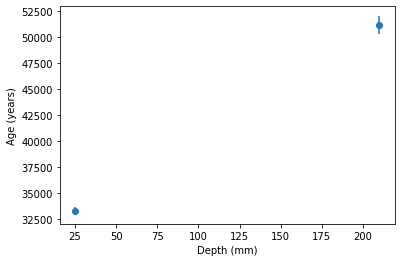

In [229]:
# Reading in stalagmite depth, age, age_error
data      = read_csv('ages.csv')
depth     = data.Depth # x
age       = data.Age # y
age_err   = data.Error # 2std dev
depth_ax  = np.linspace( depth[0], depth[1], 100 )

plt.errorbar( depth, age, yerr=age_err, fmt="o" )
plt.ylabel( 'Age (years)' )
plt.xlabel( 'Depth (mm)' )
plt.show()

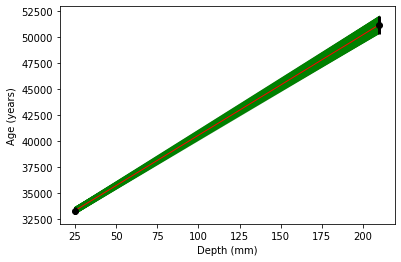

In [231]:
# Constructing monte carlo simulations

number_of_simulations = 1000
stal_age_mc           = []


for j in range(number_of_simulations):
    
    age_ax = stal_age( depth,depth_ax,age, age_err )
    stal_age_mc.append(age_ax)
    
med_stal_age_mc = np.median(stal_age_mc,axis=0) 


for y_mc in stal_age_mc:
    plt.plot(depth_ax, y_mc,'g',linewidth=1,alpha=0.1)
    
plt.errorbar( depth, age, yerr=age_err, fmt="ko",elinewidth=3)
plt.plot(depth_ax,med_stal_age_mc ,'r',linewidth=1)   
plt.ylabel( 'Age (years)' )
plt.xlabel( 'Depth (mm)' )
plt.show()


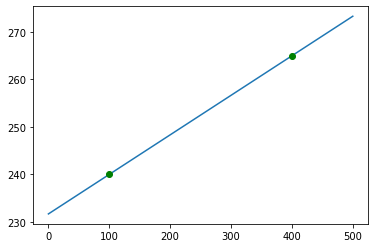

In [225]:
# Example: Equation of a straight line given two points 
x = [100, 400]
y = [240,265]

coefficients = np.polyfit(x,y,1)

polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0,500,100)
y_axis = polynomial(x_axis)

plt.plot(x_axis, y_axis)
plt.plot( x[0], y[0], 'go')
plt.plot( x[1], y[1], 'go' )
plt.show()